Abyanandi Zaintama
H8 DSFT Batch 1
Graded Challenge 3

Kickstarter Is an American public-benefit corporation based in Brooklyn, New York, that maintains a global crowdfunding platform focused on creativity The company's stated mission is to "help bring creative projects to life". Kickstarter has reportedly received more than $1.9 billion in pledges from 9.4 million backers to fund 257,000 creative projects, such as films, music, stage shows, comics, journalism, video games, technology and food-related projects.

People who back Kickstarter projects are offered tangible rewards or experiences in exchange for their pledges. This model traces its roots to subscription model of arts patronage, where artists would go directly to their audiences to fund their work.

# Importing Module #

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
import plotly.tools as tls
import plotly
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
from scipy.stats import t as t_func
from scipy.stats import norm
from scipy.stats import kurtosis 

import warnings
from collections import Counter

# Data Loading #

In [3]:
df_raw = pd.read_csv('Dataset/ks-projects-201801.csv')

In [4]:
print(df_raw.shape)
df_raw.head(5)

(378661, 15)


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [6]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


# State Feature #

We will start looking the state column distribution that might will be our key to understand this dataset

In [7]:
state = round(df_raw['state'].value_counts()/len(df_raw['state'])*100,2)

labels = list(state.index)
values = list(state.values)

trace1 = go.Pie(labels=labels, values=values, marker=dict(colors=['red']))

layout = go.Layout(title = 'Distribution of States', legend=dict(orientation='h'))

fig = go.Figure(data=[trace1], layout=layout)
iplot(fig)

From the pie-chart only 35,4% of all projects got success, more than 60% have failed or cancelled. 

Group some categories and filter by failed or successful projects. Although, projects that are categorized as canceled, suspended, undefined, will be replaced as failed

In [10]:
df_raw.loc[df_raw.state.isin(['suspended', 'canceled']), 'state'] = 'failed'
#df_raw = df_raw.loc[df_raw['state'].isin(['failed','successful'])]
print(df_raw.shape)
df_raw.head(5)

(372300, 15)


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,failed,14,US,1283.0,1283.0,19500.00


In [21]:
df_failed = df_raw[df_raw['state'] == "failed"]
df_sucess = df_raw[df_raw['state'] == "successful"]

# Measuring Central Tendency and Variance

Measuring central tendency of usd_goal_real by state

## For success state

In [66]:
df_sucess['usd_goal_real'].describe()

count    1.339560e+05
mean     9.532853e+03
std      2.796144e+04
min      1.000000e-02
25%      1.301915e+03
50%      3.837740e+03
75%      1.000000e+04
max      2.015609e+06
Name: usd_goal_real, dtype: float64

<AxesSubplot:ylabel='Frequency'>

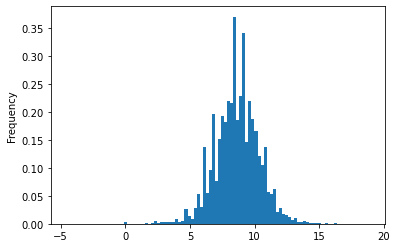

In [20]:
np.log(df_raw['usd_goal_real']).plot.hist(bins=100,density=True)

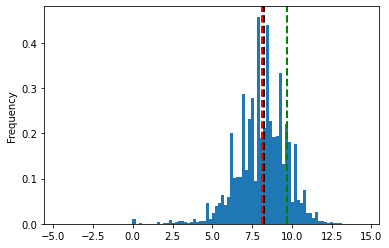

In [44]:
np.log(df_sucess['usd_goal_real']).plot.hist(bins=100,density=True)
plt.axvline(np.log(df_sucess['usd_goal_real']).describe()['mean'], color='red',linestyle='dashed',linewidth=2)
plt.axvline(np.log(df_sucess['usd_goal_real']).describe()['50%'],color='black',linestyle='dashed',linewidth=2)
plt.axvline(np.log(df_sucess['usd_goal_real']).describe()['mean']+np.log(df_sucess['usd_goal_real']).describe()['std'],color='green',linestyle='dashed',linewidth=2)

In [92]:
print('Variance : ' + str(df_sucess['usd_goal_real'].var()))
print('Quantile :' + str(df_sucess['usd_goal_real'].quantile([0.25, 0.5, 0.75])))

Variance : 781842256.1397061
Quantile :0.25     1301.915
0.50     3837.740
0.75    10000.000
Name: usd_goal_real, dtype: float64


From the success status, the mean of usd_goal_real is $9533
and the median is $3837. And the max value at $2015609

## For failed state

In [97]:
df_failed['usd_goal_real'].describe()

count    2.383440e+05
mean     6.606071e+04
std      1.438389e+06
min      1.000000e-02
25%      2.672580e+03
50%      7.700000e+03
75%      2.222342e+04
max      1.663614e+08
Name: usd_goal_real, dtype: float64

<AxesSubplot:ylabel='Frequency'>

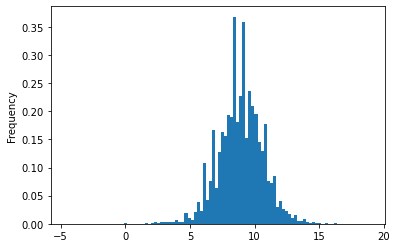

In [98]:
np.log(df_failed['usd_goal_real']).plot.hist(bins=100,density=True)

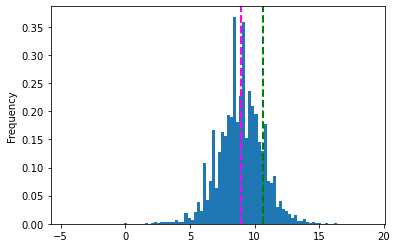

In [59]:
np.log(df_failed['usd_goal_real']).plot.hist(bins=100,density=True)
plt.axvline(np.log(df_failed['usd_goal_real']).describe()['mean'], color='red',linestyle='dashed',linewidth=2)
plt.axvline(np.log(df_failed['usd_goal_real']).describe()['50%'],color='magenta',linestyle='dashed',linewidth=2)
plt.axvline(np.log(df_failed['usd_goal_real']).describe()['mean']+np.log(df_failed['usd_goal_real']).describe()['std'],color='green',linestyle='dashed',linewidth=2)

In [94]:
print('Variance : ' + str(df_failed['usd_goal_real'].var()))
print('Quantile :' + str(df_failed['usd_goal_real'].quantile([0.25, 0.5, 0.75])))

Variance : 2068963844385.4805
Quantile :0.25     2672.58
0.50     7700.00
0.75    22223.42
Name: usd_goal_real, dtype: float64


From the failed status, the mean of usd_goal_real is $66060
and the median is $7700. And the max value at $4005111

# Chi Square

Checking relation between main category and usd_pledged_real

In [52]:
df_pivot = df_raw.groupby(['state','main_category']).mean()[['usd_goal_real','usd_pledged_real']].reset_index()
df_pivot.head(5)

,state,main_category,usd_goal_real,usd_pledged_real
0,failed,Art,63821.978563,606.128601
1,failed,Comics,36696.180837,983.909988
2,failed,Crafts,12828.696056,365.379927
3,failed,Dance,17841.455018,605.389213
4,failed,Design,56673.489342,3406.555558


In [53]:
df_pivot=df_pivot.pivot(index='state',columns='main_category',values='usd_goal_real').fillna(0)
df_pivot.head(5)

main_category,Art,Comics,Crafts,Dance,Design,Fashion,Film & Video,Food,Games,Journalism,Music,Photography,Publishing,Technology,Theater
state,,,,,,,,,,,,,,,
failed,63821.978563,36696.180837,12828.696056,17841.455018,56673.489342,26855.802277,125799.835819,61706.994116,62032.100870,107832.094733,25422.312926,14854.633331,33962.571664,121813.807261,60216.532172
successful,4410.086374,5397.352176,3013.430794,4601.094769,15408.835300,9080.955291,11145.188408,11633.962945,14857.224807,8148.647846,5736.980040,6490.599673,5897.848654,26286.354186,5198.043532


In [54]:
chisq, pvalue, df, expected = stats.chi2_contingency(df_pivot)
print(f'Observed chi2: {chisq:.4f}')
print(f'p-value: {pvalue:.4f}')

Observed chi2: 30629.0115
p-value: 0.0000


Dengan nilai chi-square diatas, dapat disimpulkan ada hubungan antara state dengan main_category

# Two Sample Test

In [77]:
df_make_smy = df_raw.groupby('main_category').agg({'usd_goal_real':['count','mean']}).reset_index()
df_make_smy.columns = df_make_smy.columns.droplevel()

In [71]:
df_make_smy.sort_values('count',ascending=False)

,,count,mean
6,Film & Video,62399,6241.054663
10,Music,49403,3913.384594
12,Publishing,39113,3394.516367
8,Games,34943,21173.331657
13,Technology,32189,21247.131029
4,Design,29763,24480.313869
0,Art,27959,3226.750566
7,Food,24418,5125.851325
5,Fashion,22563,5751.739819
14,Theater,10871,4009.283645


H0 = Food membutuhkan penggalangan dana yang lebih banyak
H1 = Fashion membutuhkan penggalangan dana yang lebih banyak

In [85]:
df_food = df_raw[df_raw['main_category']=='Food']
df_fashion = df_raw[df_raw['main_category']=='Fashion']

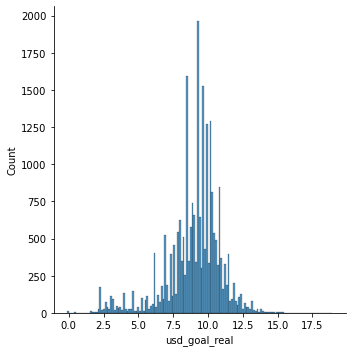

In [86]:
sns.displot(np.log(df_food['usd_goal_real']))

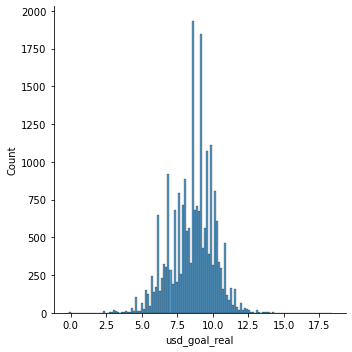

In [87]:
sns.displot(np.log(df_fashion['usd_goal_real']))

food sample mean:557.8507300646554
food sample std :491.3901000074427
food kurtosis:-1.0593953827830858
fashion sample mean:755.3661620732213
t-statistic:20.016857986028548
p-value:0.000000


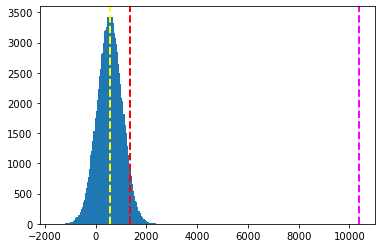

In [88]:
np.random.seed(123)
nonMath = df_food[df_food['usd_goal_real']<=1500]['usd_goal_real']
math =  df_fashion[df_fashion['usd_goal_real']<=1500]['usd_goal_real']
print("food sample mean:" + str(nonMath.mean()))
print("food sample std :" + str(nonMath.std()))
print("food kurtosis:" + str(nonMath.kurtosis()))
print("fashion sample mean:" + str(math.mean()))

# Independent T-Test
t,p = stats.ttest_ind(math, nonMath)
# ttest_ind is 2-tailed, so half the resulting p-value to get a 1-tailed p-value
p1 = '%f' % (p/2)
print("t-statistic:" + str(t))
print("p-value:" + str(p1))

pop = np.random.normal(nonMath.mean(), nonMath.std(), 100000)
# calculate a 90% confidence interval. 10% of the probability is outside this, 5% in each tail
ci = stats.norm.interval(0.90, nonMath.mean(), nonMath.std())
plt.hist(pop, bins=100)
# show the hypothesized population mean
plt.axvline(pop.mean(), color='yellow', linestyle='dashed', linewidth=2)
# show the right-tail confidence interval threshold - 5% of propbability is under the curve to the right of this.
plt.axvline(ci[1], color='red', linestyle='dashed', linewidth=2)
# show the t-statistic - the p-value is the area under the curve to the right of this
plt.axvline(pop.mean() + t*pop.std(), color='magenta', linestyle='dashed', linewidth=2)
plt.show()

Dari two-sample test diatas dapat disimpulkan bahwa penggalangan dana pada main_category food lebih rendah jika dibandingkan dengan fashion. Dalam kata lain, kita bisa mereject null hypothesis

# Overall Analysis

- From the pie-chart only 35,4% of all projects got success, more than 60%  have failed or cancelled. 
- The central tendency of usd_goal_real, either with the success or failed main_category are in the middle of the distribution, so it is a normal distribution
- In the chi square test, we can conclude that there is a relation between main_category and status of the campaign(failed or success)
- In the two test sample, the null hypothesis is the main_category food need more fund to be funded and the alternative hypothesis is the main_category fashion need more fund to be funded. From the test and graph, we can conclude that fashion campaign is needed to be funded that food category. We can reject the null hyphothesis.